In [1]:
# Install Kaggle library
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 241.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111919 sha256=10c114801971fef2380a1ca698155adfc6add3765c4a7d2da892bd596bc17de9
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/c5/94/5b/08d5bb9b7b78401fa26da264ef32d72bfbd9cb74641c65169b
Successfully built kaggle


ModuleNotFoundError: No module named 'google'

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset


  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 27.3MB/s]


In [ ]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


Training set shape (X, y): (80000, 8) (80000,)
Testing set shape (X, y): (20000, 8) (20000,)


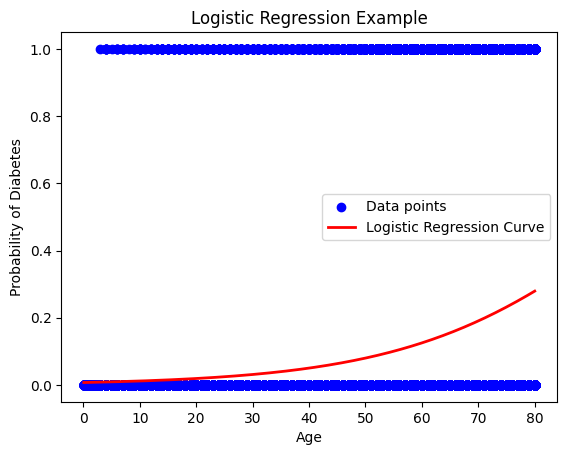

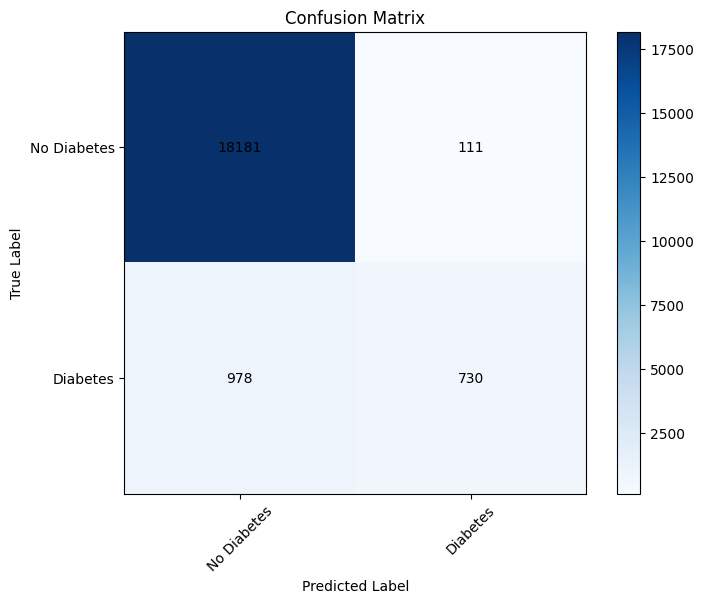

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

df = pd.read_csv('diabetes_prediction_dataset.csv')
df
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)
# Identify the numerical columns that need standardization
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test set using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Extract features (X) and target variable (y)
X = df['age'].values.reshape(-1, 1)
y = df['diabetes']

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on a test set
X_test = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')  # plot the logistic regression curve
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Example')
plt.legend()
plt.show()
# Extract features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.show()

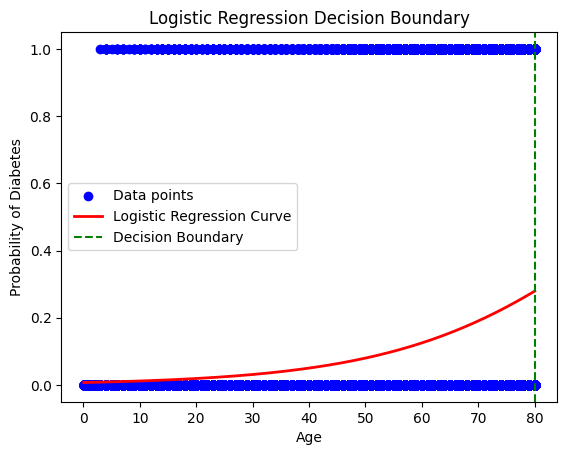

In [ ]:
# Initialize and fit the logistic regression model on 'age' feature
X = df['age'].values.reshape(-1, 1)
y = df['diabetes']
model = LogisticRegression()
model.fit(X, y)

# Create a range of ages for prediction
X_test = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Find the decision boundary (where probability is 0.5)
decision_boundary = X_test[np.abs(y_prob - 0.5).argmin()]

# Plotting
plt.scatter(X, y, color='blue', label='Data points')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')  # plot the logistic regression curve
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='Decision Boundary')  # plot the decision boundary
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()